### **Figure 3 of "Digital Safety Nets: How Social Networks Shape Online Medical Crowdfunding Performance"**
#### **llustration of two types of sharing network structure (holding #views constant)**
#### Author: Xu Han, Yiqing Xing, Junjian Yi, Haochen Zhang
#### Code author: Xu Han

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def narrow_but_far(tree):
    path = [(0, 4), (0, 5), (4, 15), (4, 16), (5, 17), (5, 18),
           (15, 38), (16, 39), (16, 40), (17, 41), (17, 42), (18, 43)]
    return path

In [3]:
def wide_but_near(tree):
    path = [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (2, 11), (3, 14), (4, 15), (5, 18), (6, 19), (7, 22)]
    return path

In [4]:
def create_tree_graph():
    G = nx.DiGraph()
    G.add_edges_from([
        (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8),
        (1, 9), (1, 10), (2, 11), (2, 12), (3, 13), (3, 14),
        (4, 15), (4, 16), (5, 17), (5, 18), (6, 19), (6, 20),
        (7, 21), (7, 22), (8, 23), (8, 24),
        (9, 25), (9, 26), (10, 27), (10, 28), (11, 29), (11, 30),
        (12, 31), (12, 32), (13, 33), (13, 34), (14, 35), (14, 36),
        (15, 37), (15, 38), (16, 39), (16, 40), (17, 41), (17, 42),
        (18, 43), (18, 44), (19, 45), (19, 46), (20, 47), (20, 48),
        (21, 49), (21, 50), (22, 51), (22, 52), (23, 53), (23, 54),
        (24, 55), (24, 56)
    ])
    # Add layer information to each node
    for node in G.nodes():
        if node == 0:
            G.nodes[node]['subset'] = 0  # Root layer
        elif node in {1, 2, 3, 4, 5, 6, 7, 8}:
            G.nodes[node]['subset'] = 1  # First layer
        elif node in range(9, 25):
            G.nodes[node]['subset'] = 2  # Second layer
        else:
            G.nodes[node]['subset'] = 3  # Third layer
    return G

In [5]:
def get_nodes_in_path(edges):
    nodes = set()
    for edge in edges:
        nodes.update(edge)
    return list(nodes)

In [6]:
# Generate the tree graph
tree_graph = create_tree_graph()

In [7]:
# Generate paths
nf_edges = narrow_but_far(tree_graph)
wn_edges = wide_but_near(tree_graph)

In [8]:
# Get positions for visualization using a multipartite layout
pos = nx.multipartite_layout(tree_graph, subset_key='subset', align='horizontal')

# Flip the y coordinate to make the tree vertical, adjust width for each layer
for node in pos:
    if tree_graph.nodes[node]['subset'] == 1:
        pos[node] = (pos[node][0] * 15, -pos[node][1])
    elif tree_graph.nodes[node]['subset'] == 2:
        pos[node] = (pos[node][0] * 9, -pos[node][1])
    elif tree_graph.nodes[node]['subset'] == 3:
        pos[node] = (pos[node][0] * 5, -pos[node][1])
    else:
        pos[node] = (pos[node][0], -pos[node][1])

In [9]:
nf_nodes = get_nodes_in_path(nf_edges)
wn_nodes = get_nodes_in_path(wn_edges)

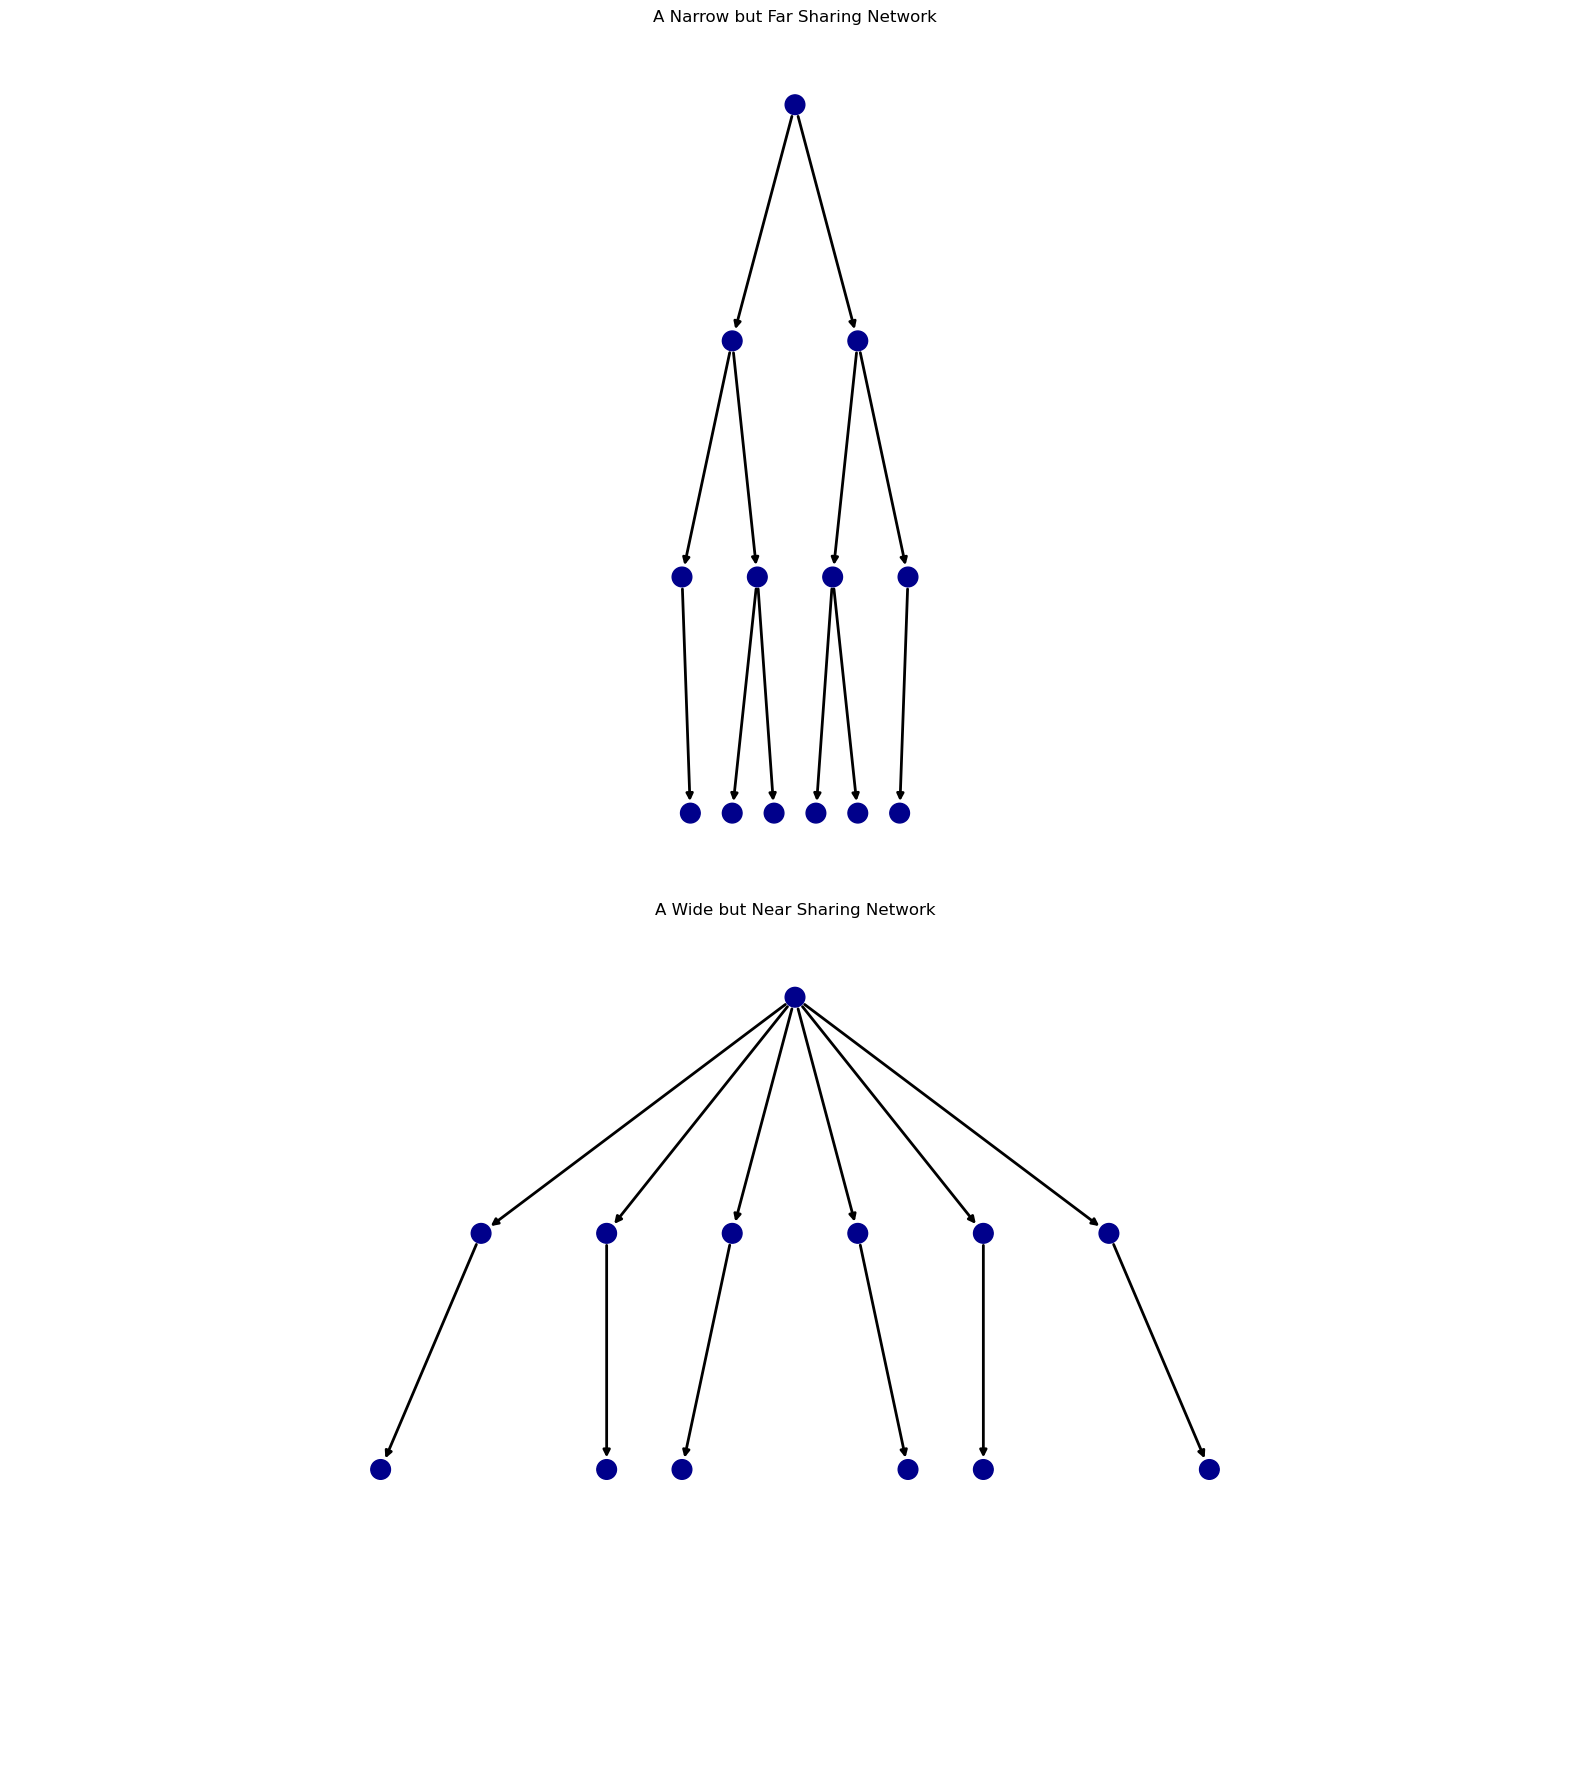

In [10]:
# Figure3
# Draw the graphs
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))

# Narrow but far path
node_colors = ["darkblue" if node in nf_nodes else "white" for node in tree_graph.nodes()]
nx.draw(tree_graph, pos, ax=axes[0], with_labels=False, node_size=200, node_color=node_colors, edge_color="white", font_size=8, arrows=False)
nx.draw_networkx_edges(tree_graph, pos, ax=axes[0], edgelist=nf_edges, edge_color="black", width=2)
axes[0].set_title("A Narrow but Far Sharing Network")

# Wide but near path
node_colors = ["darkblue" if node in wn_nodes else "white" for node in tree_graph.nodes()]
nx.draw(tree_graph, pos, ax=axes[1], with_labels=False, node_size=200, node_color=node_colors, edge_color="white", font_size=8, arrows=False)
nx.draw_networkx_edges(tree_graph, pos, ax=axes[1], edgelist=wn_edges, edge_color="black", width=2)
axes[1].set_title("A Wide but Near Sharing Network")

plt.tight_layout()
plt.show()

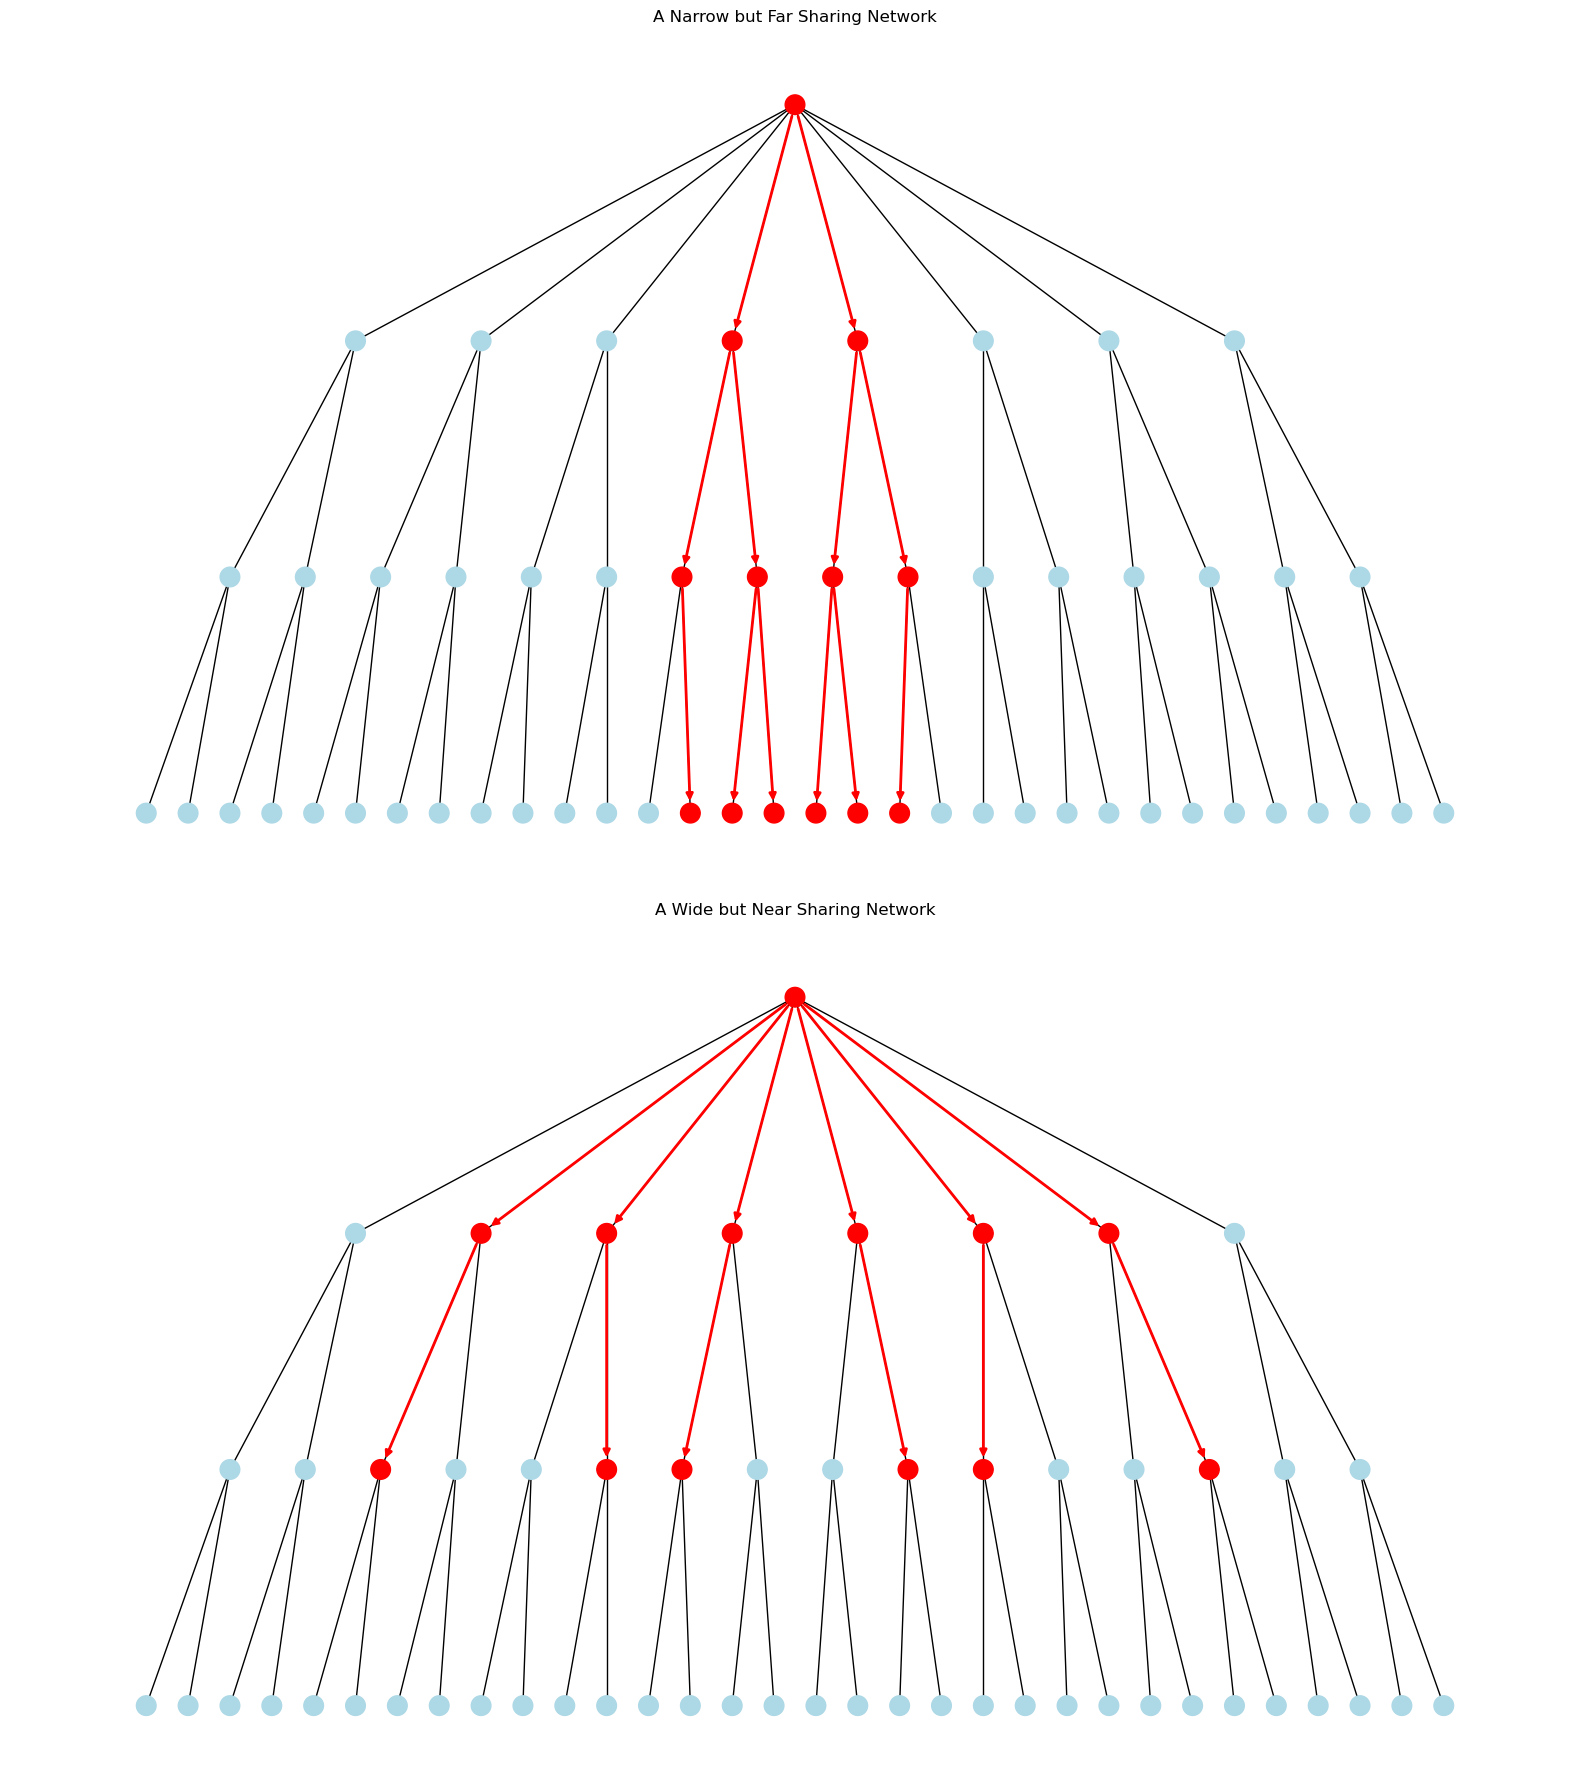

In [11]:
# With underlying network
# Draw the graphs
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))

# Narrow but far
node_colors = ["red" if node in nf_nodes else "lightblue" for node in tree_graph.nodes()]
nx.draw(tree_graph, pos, ax=axes[0], with_labels=False, node_size=200, node_color=node_colors, font_size=8, arrows=False)
nx.draw_networkx_edges(tree_graph, pos, ax=axes[0], edgelist=nf_edges, edge_color="red", width=2)
axes[0].set_title("A Narrow but Far Sharing Network")

# Wide but near
node_colors = ["red" if node in wn_nodes else "lightblue" for node in tree_graph.nodes()]
nx.draw(tree_graph, pos, ax=axes[1], with_labels=False, node_size=200, node_color=node_colors, font_size=8, arrows=False)
nx.draw_networkx_edges(tree_graph, pos, ax=axes[1], edgelist=wn_edges, edge_color="red", width=2)
axes[1].set_title("A Wide but Near Sharing Network")

plt.tight_layout()
plt.show()